In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import the data

In [5]:
data =  pd.read_csv('train.csv', encoding = "latin1", on_bad_lines = 'skip', lineterminator= '\n', skip_blank_lines = True)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
# rom ydata_profiling import ProfileReport

In [7]:
# profile = ProfileReport(data, title="Profiling Report")
# profile

In [8]:
# find duplicate rows
duplicate_rows = data[data.duplicated()==True]
duplicate_rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
755,"|style=""""""""width: 50%; border:0; background-co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,|-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1239,|-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,"|style=""""""""color:#000""""""""|",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8729,"How to: edit a page "" upload and use images G...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
163221,|-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163222,"|style=""""""""color:#000""""""""|",NaN,NaN,NaN,NaN,NaN,NaN,NaN
163223,"Build consensus "" Resolve disputes",NaN,NaN,NaN,NaN,NaN,NaN,NaN
163224,"Assume good faith "" Civility "" Etiquette",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(161674, 8)

In [10]:
data.isnull().sum()

id                  1
comment_text     1179
toxic            2068
severe_toxic     2283
obscene          2400
threat           2480
insult           2518
identity_hate    2787
dtype: int64

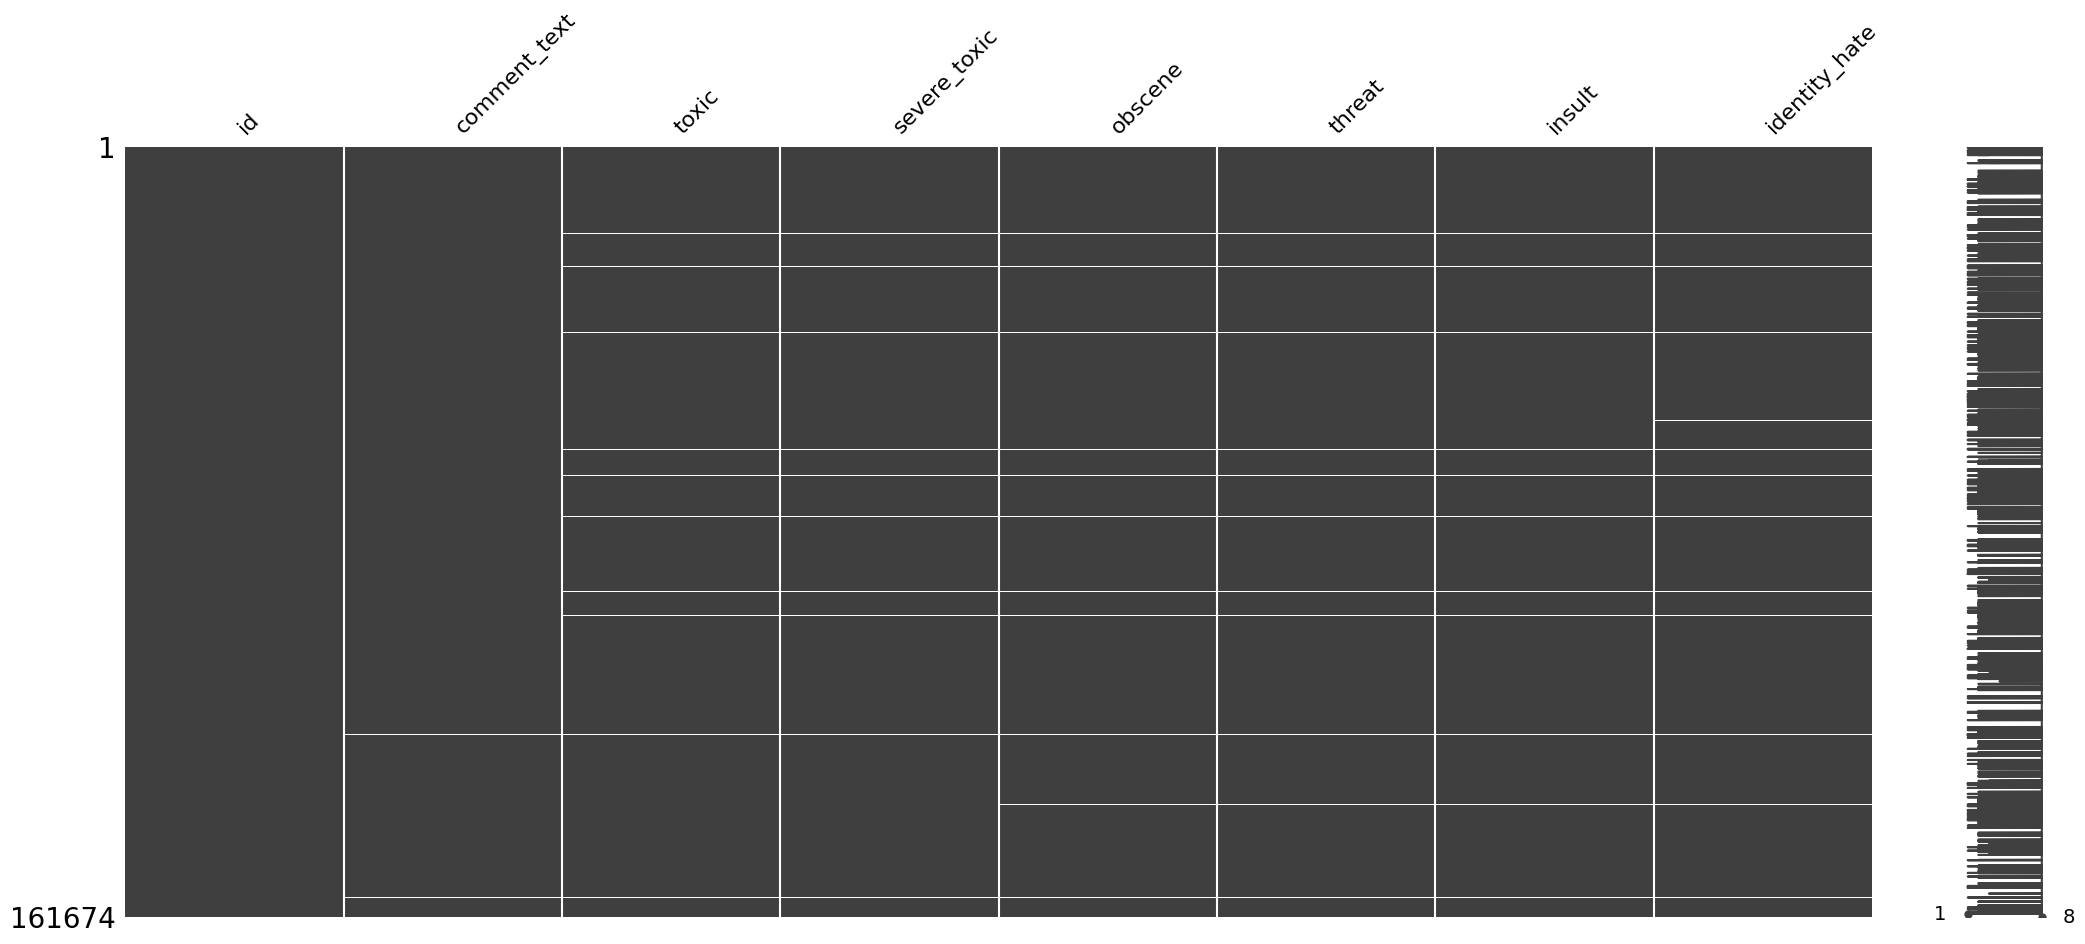

In [11]:
# visulaizing the null values
import missingno as msno
msno.matrix(data)
plt.show()

In [12]:
# dropping all rows with any missing values
data = data.dropna(axis=0, how= 'any', inplace= False).reset_index(drop=True)
data.shape

(158887, 8)

**dropping rows with non-numeric entries for the labels**

In [13]:
data.loc[(data['toxic']!='0')&
                   (data['toxic']!='1')]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
10,Thanks for uploading Image:Wonju.jpg. I notice...,so the copyright status is unclear. If you di...,then you will need to specify the owner of th...,then a link to the website from which it was ...,together with a restatement of that website's...,is usually sufficient information. However,if the copyright holder is different from the...,then their copyright should also be acknowled...
126,= My Famous Article ==witze happiness  wikip...,regardless of race,age,character or knowledge. The outside world kno...,and the honour of the Witzeman. For those who...,it has been said to have been a great honour,although the qualities needed for the job hav...,until they are called by former Witzemans via...
12624,It seems that people are using this page to pr...,or own obscure tastes,"which they find """"""""super."""""""" I agree with t...",and will weed out some of the lesser-known acts,and those featuring lesser-known musicians. F...,if you believe that I'm wrong. The preceding...,December 14,2004 (UTC)
12944,Twitter and Wikia usually are not reliable so...,especially the latter,like Wikipedia. As I had said,if you can find a reliable source,like a news agency,that discusses the hackings in detail,then it might be considered. Blog posts from ...,profiles and tweets are not enough. 24Mati
13367,Take a chill pill. My mistake,perhaps it should have been no game trivia,item 6 instead. Also,"your revision """"""""You can also unlock several...",but wikipedia users are total fags and think ...,doesn't really contribute to the article,violates npa and is misleading (it's guidelin...,"so I reverted it. Thanks! ©"""
15607,The New Catholic Encyclopedia (1967,Vol. IX,"p. 337) admits regarding the Greek words a""de...",used at Matthew 13:55,56,that these have the meaning of full blood br...,motivated by the Churchs traditional faith i...,wrote a tract against Helvidius (A.D. 383) in...
16475,As there are Spaniards in the movie,it's sure that the movie doesn't take place b...,you can't guarantee what is the exact year. T...,but they have not to be the first Spaniards i...,just the first in the lands of the Mayan city...,and later these people could extend the sickn...,but their Black Plague destroyed 1/3 of the E...,and the Incas fell on civil war because an ep...
29192,Next time,"type """"""""http://en.wikipedia.org/wiki/"""""""" on...","then type """"""""User:Esskater11/*USERBOX NAME*""...","or """"""""Template:*USERBOX NAME*""""""""",preferably if the userbox's topic is 'univers...,well,the name of the userbox,"and there you go! '/PenaltyKillah(discuss""edi..."
37388,I see that you already have an archive,therefore you can just edit this page,cut out the bit you want to archive,save the page,then open up User talk:Falcon8765/Archive 1,go to the end,paste it in there,save that.
39759,"9. """"""""It is also a clear fact that the system...",be the guard,stance,and striking techniques,"is identical to Muay Thai."""""""" This is actual...",tomoi is the same as muay Thai and Muay Lao. ...,that doesn't necessarily mean tomoi came from...,they may all have their origins in Cambodia o...


In [14]:
# drop colums here toxic is neither 0 nor 1
data = data.drop(data.loc[(data['toxic']!='0')&
                   (data['toxic']!='1')].index).reset_index(drop=True)
print(data.shape)

(158866, 8)


In [15]:
# checking for non-numeric enries in the remaining labels

print(data.loc[(data['severe_toxic']!='0')&
                   (data['severe_toxic']!='1')].shape)
print(data.loc[(data['obscene']!='0')&
                   (data['obscene']!='1')].shape)
print(data.loc[(data['threat']!='0')&
                   (data['threat']!='1')].shape)
print(data.loc[(data['insult']!='0')&
                   (data['insult']!='1')].shape)
print(data.loc[(data['identity_hate']!='0')&
                   (data['identity_hate']!='1')].shape)


(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)


In [16]:
# checking for duplicate comment
duplicate_comment = data.loc[data['comment_text'].duplicated()==True]
duplicate_comment

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
84901,e427c9ca872b5e42,"""\n\n JTWC prognostic reasonings",0,0,0,0,0,0


In [17]:
# remove duplicate entry in comments column
data = data.drop_duplicates(subset=['comment_text'], keep='first')
data.shape

(158865, 8)


**$\color{green}{\text{creating a new column named toxicity to show multilabelling}}$**

In [18]:
df = data.copy()

In [19]:
data.loc[data['toxic']=='1', 'toxic'] = 'toxic'
data.loc[data['severe_toxic']=='1', 'severe_toxic'] = 'severe_toxic'
data.loc[data['obscene']=='1', 'obscene'] = 'obscene'
data.loc[data['threat']=='1', 'threat'] = 'threat'
data.loc[data['insult']=='1', 'insult'] = 'insult'
data.loc[data['identity_hate']=='1', 'identity_hate'] = 'identity_hate'

In [20]:
# creating a new column, the target variable with toxicity as column name
a = (data['toxic'].values+','+data['severe_toxic'].values+','+
     data['obscene'].values+','+data['threat'].values+','+data['insult'].values+','+data['identity_hate'].values)

target = list()
for i in range(0,len(data)):
    b = a[i].split(',')
    b = [x for x in b if x!='0']
    b = ','.join(b)
    target.append(b)
data['toxicity'] = target
data.loc[data['toxicity']=='', 'toxicity']= "non_toxic"

In [21]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,non_toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,non_toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,non_toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,non_toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,non_toxic


In [22]:
# including the column toxicity to the original dataframe df
df['toxicity']=data['toxicity']
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,non_toxic
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,non_toxic
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,non_toxic
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,non_toxic
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,non_toxic


In [23]:
# changing the datatype of the labels (toxic, severe_toxic, obscene, threat, insult, identity_hate)
col_name = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[col_name] = df[col_name].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158865 entries, 0 to 158865
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             158865 non-null  object
 1   comment_text   158865 non-null  object
 2   toxic          158865 non-null  int32 
 3   severe_toxic   158865 non-null  int32 
 4   obscene        158865 non-null  int32 
 5   threat         158865 non-null  int32 
 6   insult         158865 non-null  int32 
 7   identity_hate  158865 non-null  int32 
 8   toxicity       158865 non-null  object
dtypes: int32(6), object(3)
memory usage: 8.5+ MB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,158865.0,0.096176,0.294833,0.0,0.0,0.0,0.0,1.0
severe_toxic,158865.0,0.010040,0.099696,0.0,0.0,0.0,0.0,1.0
obscene,158865.0,0.053133,0.224300,0.0,0.0,0.0,0.0,1.0
threat,158865.0,0.003009,0.054771,0.0,0.0,0.0,0.0,1.0
insult,158865.0,0.049552,0.217017,0.0,0.0,0.0,0.0,1.0
identity_hate,158865.0,0.008838,0.093593,0.0,0.0,0.0,0.0,1.0


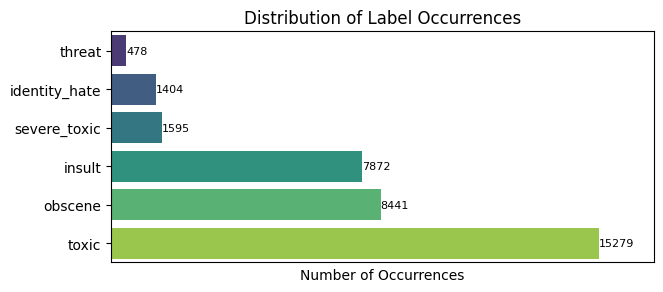

In [26]:
# Visualizing the class distribution of the 'label' column
column_labels = df.columns.tolist()[2:-1]
label_counts = df[column_labels].sum().sort_values()

plt.figure(figsize=(7, 3))
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')
plt.xlabel('Number of Occurrences')
plt.title('Distribution of Label Occurrences')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(ticks=[])
plt.xlim(0,17000)
# Show the plot
plt.show()

In [27]:
label_counts

threat             478
identity_hate     1404
severe_toxic      1595
insult            7872
obscene           8441
toxic            15279
dtype: int64

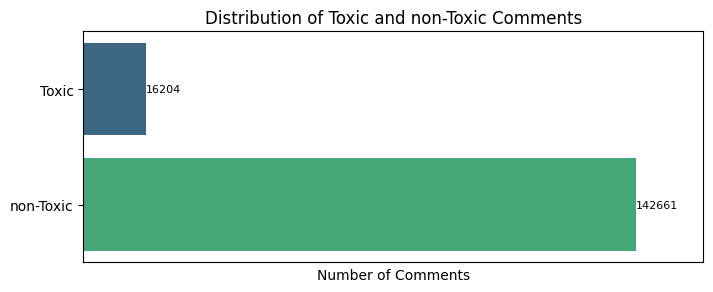

In [28]:
# toxic and non toxic data
toxic_comm = df.loc[df[column_labels].sum(axis=1) > 0]
non_toxic_comm = df.loc[df[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(toxic_comm)
num_clean = len(non_toxic_comm)

# Create DataFrame
plot_data = pd.DataFrame(
    {'Category': ['Toxic', 'non-Toxic'], 'Count': [num_toxic, num_clean]})

# creating a plot
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')
plt.xlabel('Number of Comments')
plt.ylabel('')
plt.title('Distribution of Toxic and non-Toxic Comments')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(ticks=[])
plt.xlim(0,160000)
plt.show()


In [29]:
df.loc[df['toxicity']!='non_toxic','toxicity']



6          toxic,severe_toxic,obscene,insult
11                                     toxic
15                                     toxic
41        toxic,obscene,insult,identity_hate
42                      toxic,obscene,insult
                         ...                
158789    toxic,obscene,insult,identity_hate
158809                          toxic,insult
158836                  toxic,obscene,insult
158841                          toxic,insult
158849                  toxic,obscene,insult
Name: toxicity, Length: 16204, dtype: object

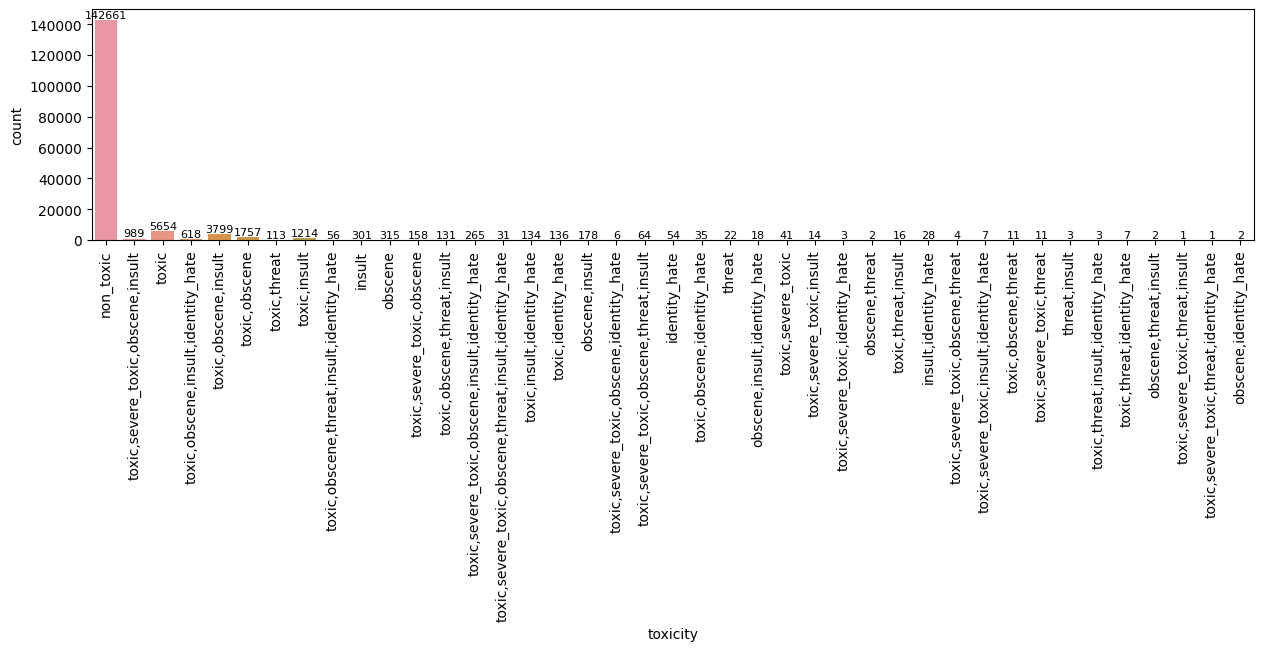

In [30]:
# toxicity plot
plt.figure(figsize=(15,3))
ax = sns.countplot(x = 'toxicity', data = df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fontsize = 8)
plt.show()

**Conclusions from the data preprocessing**  
**1) The data is imbalanced, as there are about 88% comments that are non-toxic.**   
**2) The problem comes under the multilable, binary classification as a comment can have multiple lables.**

So in order to balance the data, we took random samples from the non-toxic data to match the size of toxic data

In [31]:
# dropping these rows is giving better classification with the Random forest Classifier
df = df.drop(df.loc[df['toxicity']=='toxic'].index).reset_index(drop=True)
# Randomly sample non-toxic comments
toxic_df = df.loc[df['toxicity']!='non_toxic']
clean_sampled = df.loc[df['toxicity']=='non_toxic'].sample(n=toxic_df.shape[0], random_state=42)
df_sampled = pd.concat([toxic_df, clean_sampled], axis=0)

# Shuffle the data to avoid any order bias during training
df_sampled = df_sampled.sample(frac=1, random_state=42)

print(toxic_df.shape)
print(clean_sampled.shape)
print(df_sampled.shape)
df_sampled.head()

(10550, 9)
(10550, 9)
(21100, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
37563,689cfbed898fbea0,"Hey man,imma vandal too and my ass got reporte...",1,0,1,0,0,0,"toxic,obscene"
58900,a47973d44a183954,I hate you \n\nJust kidding around. You're to...,0,0,0,0,0,0,non_toxic
120264,9e205d51200355db,OK LET ME SAY ONE THING FUCK YOU ALL:) FUCK YO...,1,1,1,0,1,0,"toxic,severe_toxic,obscene,insult"
28483,4eebb8e3c468c6fb,stop being a pussbot \n\nstop being a pussbot....,1,0,1,0,1,0,"toxic,obscene,insult"
48951,88af0890ccd7aefd,"John Cena doesnt like anal sex, he loves oral sex",1,0,1,0,1,1,"toxic,obscene,insult,identity_hate"


# text cleaning

In [32]:
import re
import nltk
import spacy # language models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

my_stop_words = stopwords.words('english')

print(len(my_stop_words))
my_stop_words.extend(['make','see','people','tell','see','give','please','take','would','think','try','good','life',
                      'really','use','want','need','one','article','like','stop','page','time','delete','edit','wikipedia',
                      'even','thing','come','way','man','make','go','get','well','see','know','wiki','org','little',
                      'stop','stephen','hawk','people','u','real','tme','call','right','need','wikize',
                      'nothing','name','leave','admin','back','never','day','find','world','read','say',
                      'talk','keep','put','fact','work','user','change','post','anything','let','world','big',
                      'hope','head','face','ur','ever','talk','piece','mean','comment','write','also','day',
                      'en','love','much','house','watch','look','much','let', 'person','thank','every','could','show','p','source','oh','new','add','still','care','editor',
                      'problem','source','information','friend','something','since','actully','many','someone','site',
                      'long','history','live','reason','place','another','word','show','around','point','revert','around',
                      'family','shall','wish','continue','maybe','must','else','eat','understand','account','boy', 'seriously','sure',
                      'remove','actually','message','guy','first','seem','anyone','guess','believe','www', 'ya', 'yea', 'yeah', 'year', 'year ago', 'year old',
                      'yes', 'yet', 'yo', 'york', 'young', 'youtube', 'zero','wikipedian', 'wikipedians','username', 'userpage', 'usual', 'utc', 'utter', 'utterly','uk', 'um', 'un','ng','mr',])

print(len(my_stop_words))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179
357


In [33]:
import re
import string
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r'doesnt','does not',text)
    text = re.sub('[-()"#/@;{}`+=~|.!?,]+', " ", text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub("[^A-Za-z" "]+"," ",text)
    text = re.sub("http",'', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    return text

In [34]:
#text lemmatization
def lemmi(seq):
    doc = nlp(' '.join(seq))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [35]:
def text_processing(txt_col):
    txt_col = [x.strip() for x in txt_col] # remove both the leading and the trailing characters
    text = txt_col
    text1=list()
    for line in text:
        line_new = ' '.join(dict.fromkeys(line.split()))
        line_new = clean_text(line_new)
        txt = line_new.split()
        txt_stop = [word for word in txt if not word in my_stop_words]
        text = lemmi(txt_stop) 
        text1.append(' '.join(text))
    txt_col = text1
    return txt_col

In [36]:
df_sampled['comment_text']=text_processing(df_sampled['comment_text'])
df_sampled.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxicity
37563,689cfbed898fbea0,hey imma vandal ass got report alot gay eh,1,0,1,0,0,0,"toxic,obscene"
58900,a47973d44a183954,hate kid fast fix,0,0,0,0,0,0,non_toxic
120264,9e205d51200355db,ok fuck,1,1,1,0,1,0,"toxic,severe_toxic,obscene,insult"
28483,4eebb8e3c468c6fb,pussbot pussbot extremely biased cannto tolera...,1,0,1,0,1,0,"toxic,obscene,insult"
48951,88af0890ccd7aefd,john cena anal sex love oral sex,1,0,1,0,1,1,"toxic,obscene,insult,identity_hate"


# visulaization through word cloud

In [37]:
from wordcloud import WordCloud, STOPWORDS
def creat_wordCloud(df, col):
    label = word_tokenize(df[df[col]==1]['comment_text'].values.sum())
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color="black", max_words=100,stopwords=my_stop_words, max_font_size= 60)
    wc.generate(" ".join(label))
    plt.title("Word cloud for "+col+" Comments", fontsize=30)
    plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
    plt.axis('off')
    return plt

    

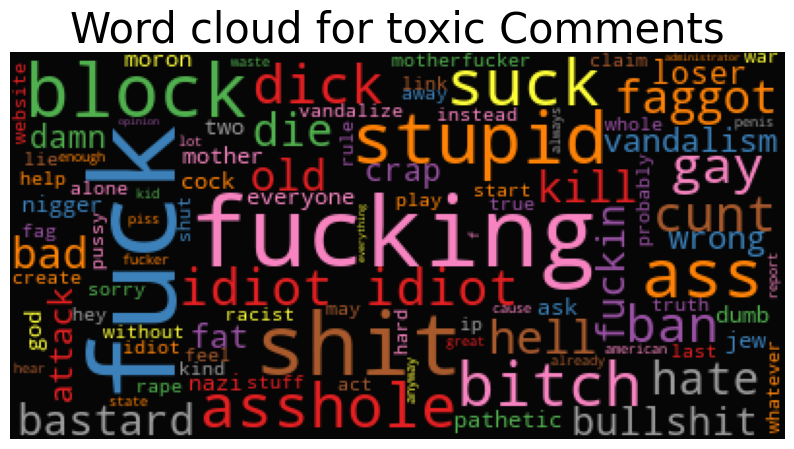

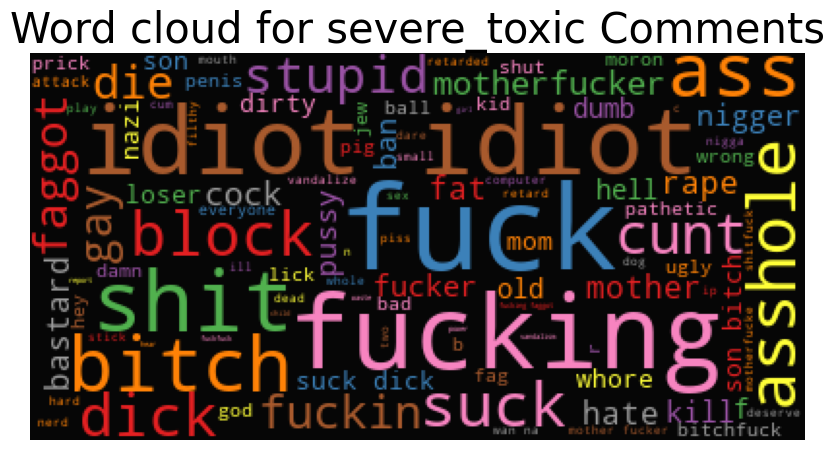

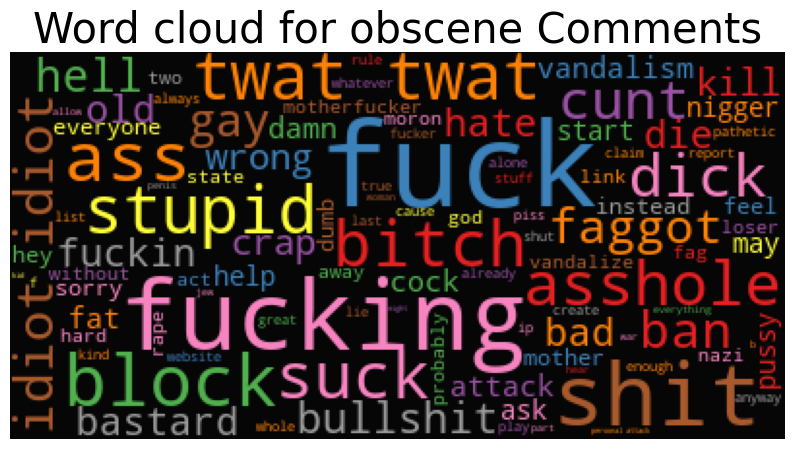

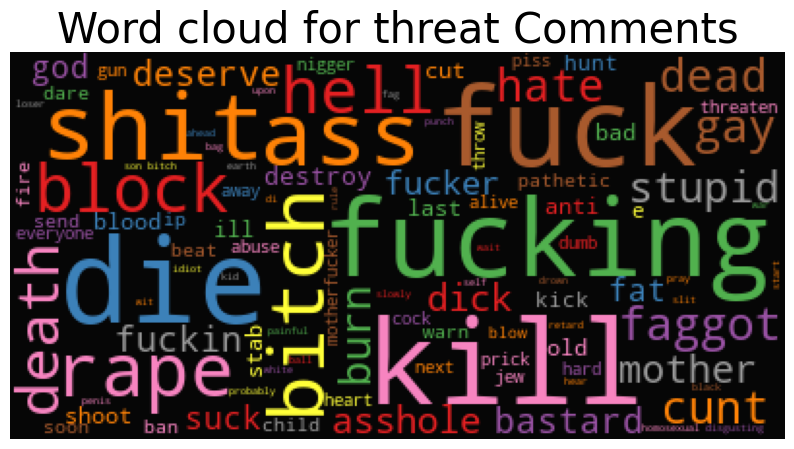

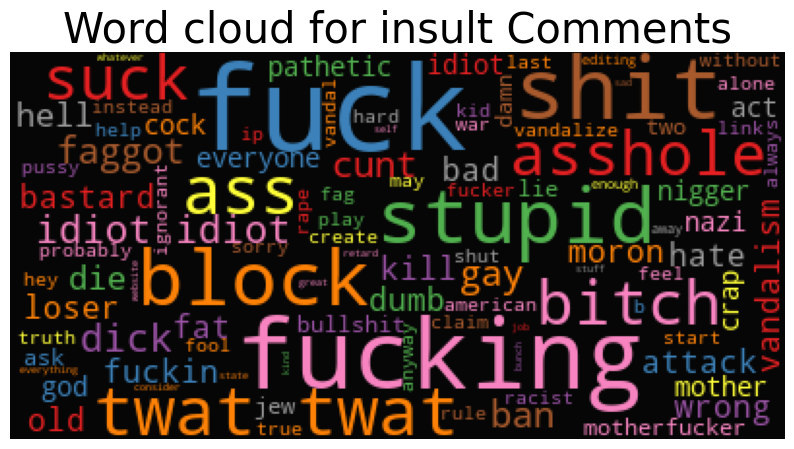

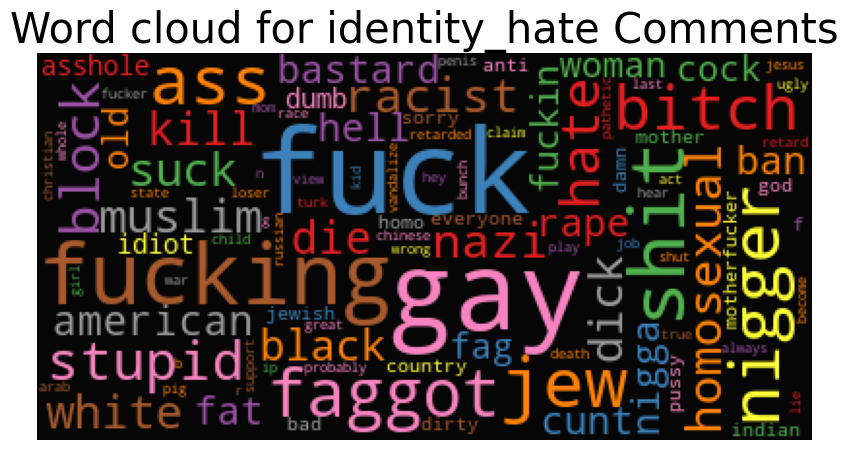

In [38]:
for col in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    creat_wordCloud(df_sampled,col)

**it can be seen in the word cloud as well that different labels in the dataset shares vocabulary**

# data splitting and feature extraction

In [39]:
X = df_sampled['comment_text']
Y = df_sampled[df_sampled.columns[2:-1]].values
Y

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
max_features = 20000  # number of words in the vacab,
max_len = 200 # Sequence length to pad the outputs to.

vectorizer = TextVectorization(max_tokens = 1800, ngrams = (1,3),
                                    output_mode = 'tf_idf')   # this means that it is going to map every single word to an integer value

vectorizer.adapt(df_sampled.loc[df_sampled.toxicity!='non_toxic', 'comment_text'])

vectorized_text = vectorizer(X)
vectorized_text

import numpy as np
x_new = np.array(vectorized_text)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, Y, test_size= 0.33)
print(X_train.shape)
print(y_train.shape)



(14137, 1800)
(14137, 6)


In [41]:
vectorized_text

<tf.Tensor: shape=(21100, 1800), dtype=float32, numpy=
array([[ 45.98907  ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [ 11.497268 ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   1.6258657,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [103.47541  ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  5.748634 ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [224.19672  ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)>

# multi label classification: model building

# 1. OneVsRestClassifier

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

model1 = OneVsRestClassifier(XGBClassifier(n_estimators=100, max_depth=11, scale_pos_weight = 1,
                                          eval_metric = 'auc',max_features=None,colsample_bytree = 0.3,
                                          random_state = 0, n_jobs =-1))
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [44]:
# model evaluation
#classification report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score ,confusion_matrix
cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
cr = pd.DataFrame(classification_report(y_test,y_pred, target_names=cols_target,output_dict=True)).T
cr['support'] = cr.support.apply(int)
print(f"Test Set Accuracy : {accuracy_score( y_test, y_pred) * 100} %\n")
print("roc_score : ",roc_auc_score(y_test, y_pred))
cr.style.background_gradient(cmap='viridis')


Test Set Accuracy : 68.82091052707166 %

roc_score :  0.7785385999600981


C:\Users\Renu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
toxic,0.931507,0.886131,0.908253,3223
severe_toxic,0.519048,0.202980,0.291834,537
obscene,0.936940,0.890110,0.912925,2821
threat,0.648936,0.354651,0.458647,172
insult,0.819883,0.802672,0.811186,2620
identity_hate,0.705263,0.442731,0.543978,454
micro avg,0.881011,0.797904,0.837401,9827
macro avg,0.760263,0.596546,0.654470,9827
weighted avg,0.865369,0.797904,0.825332,9827
samples avg,0.411200,0.399768,0.395643,9827


# 3. LSTM model

In [45]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.metrics import Precision, Recall, F1Score



In [46]:
# MCSHBAP => map, cache, shuffle, batch, prefetch
# from_tensor_slices or list_files

dataset = tensorflow.data.Dataset.from_tensor_slices((vectorized_text, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)  # how large our buffer size needs to be
dataset = dataset.batch(16)  # each batch represented as a series of 16 samples
dataset = dataset.prefetch(8)  # helps prevent bottlenecks

In [47]:
one_batch = dataset.as_numpy_iterator().next()    # batch of 16 training example
one_batch

(array([[ 183.95628 ,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        [ 172.45901 ,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        [ 143.71585 ,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        ...,
        [  57.48634 ,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        [  17.245901,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        [1258.9508  ,    0.      ,    0.      , ...,    0.      ,
            6.62615 ,    0.      ]], dtype=float32),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1

In [48]:
print(f'The dataset contains {len(dataset)} batch')
train = dataset.take(int(len(dataset)*.9))   # 90%
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.05))   # 5%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.05))  # 5%
print('lenth of train, validation and test :',len(train), len(val), len(test))

The dataset contains 1319 batch
lenth of train, validation and test : 1187 65 65


In [49]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(max_features+1, 32))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [50]:
# model training
hist = model.fit(train, epochs=3, validation_data= val, verbose=1)

Epoch 1/3

1187/1187 [==============================] - 1113s 929ms/step - loss: 0.3487 - accuracy: 0.7295 - val_loss: 0.3114 - val_accuracy: 0.6779
Epoch 2/3
1187/1187 [==============================] - 1087s 916ms/step - loss: 0.3165 - accuracy: 0.7548 - val_loss: 0.2937 - val_accuracy: 0.7038
Epoch 3/3
1187/1187 [==============================] - 1152s 970ms/step - loss: 0.3102 - accuracy: 0.7126 - val_loss: 0.2897 - val_accuracy: 0.4971


In [51]:
# model evaluation
loss, Acc = model.evaluate(test)

print('Test Loss: ', loss)
print('Test Accuracy: ', Acc)

65/65 [==============================] - 15s 221ms/step - loss: 0.3116 - accuracy: 0.5115
Test Loss:  0.3115632236003876
Test Accuracy:  0.5115384459495544


In [52]:
# calculating precision and recall
pre = Precision()
re = Recall()
for batch in test.as_numpy_iterator():
    # unpack the batch
    X_test, y_test = batch
    # make a prediction
    y_pred = model.predict(X_test)

    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_test, y_pred)
    re.update_state(y_test, y_pred)


1/1 [==============================] - 0s 201ms/step


In [53]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}')

Precision: 0.8225806355476379, Recall:0.6079469919204712


In [54]:
#make prediction
input_text = vectorizer('You freaking jew! I am going to hit you.get out of hear. shut the fuck up')
res = model.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

1/1 [==============================] - 0s 150ms/step


array([[1, 0, 1, 0, 1, 0]])

In [60]:
#make prediction
input_text = vectorizer('You freaking nigger! I am going to hit you.get out of hear. shut the fuck up')
res = model1.predict(np.expand_dims(input_text, axis=0))
(res > 0.5).astype(int)

array([[1, 1, 1, 0, 1, 1]])

In [62]:
import pickle
# Pickle the config and weights for keras vectorizer
pickle.dump({'config': vectorizer.get_config(),
             'weights': vectorizer.get_weights()}, open(r"C:\Users\Renu\Downloads\P316\models\vect.pkl", "wb"))


In [63]:
pickle.dump(model1, open('models\model.pkl','wb'))

AttributeError: 'Recall' object has no attribute 'sub'